In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'

In [1]:
def system1(t, y):
    u, s = y
    du_dt = 1 - 1 * u
    ds_dt = 1 * u - 0.6 * s
    return [du_dt, ds_dt]

def system2(t, y):
    u, s = y
    du_dt =  - 1 * u
    ds_dt = 1 * u - 0.6 * s
    return [du_dt, ds_dt]

In [3]:
t_span = [0,15]
t_eval = np.linspace(t_span[0], t_span[1], 500)

In [6]:
u0 = 0; s0 = 0
sol_up = solve_ivp(system1, t_span, [u0, s0], t_eval=t_eval)

u1 = 1; s1 = 1 / 0.6
sol_down = solve_ivp(system2, t_span, [u1, s1], t_eval=t_eval)

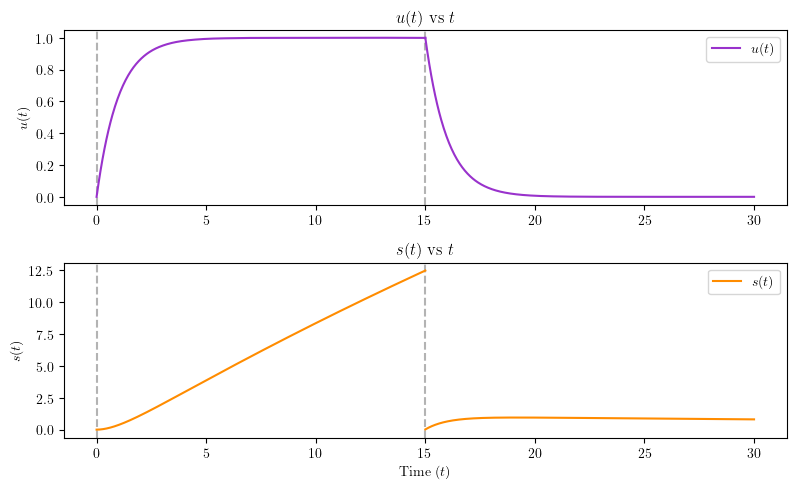

In [8]:
u_color = 'darkorchid'
plt.figure(figsize = (8, 5))
plt.subplot(2, 1, 1)
plt.axvline(x=15, color='0.7', linestyle='--')
plt.axvline(x=0, color='0.7', linestyle='--')
plt.plot(sol_up.t, sol_up.y[0], label=r'$u(t)$', color = u_color)
plt.plot(sol_down.t + 15, sol_down.y[0], color=u_color)
plt.ylabel(r'$u(t)$')
plt.title(r'$u(t)$ vs $t$')
plt.tight_layout()
plt.legend(loc = 'upper right')

s_color = 'darkorange'
plt.subplot(2, 1, 2)
plt.axvline(x=15, color='0.7', linestyle='--')
plt.axvline(x=0, color='0.7', linestyle='--')
plt.plot(sol_up.t, sol_up.y[1], label=r'$s(t)$', color = s_color)
plt.plot(sol_down.t + 15, sol_down.y[1], color=s_color)
plt.xlabel(r'Time ($t$)')
plt.ylabel(r'$s(t)$')
plt.title(r'$s(t)$ vs $t$')
plt.tight_layout()
plt.legend(loc = 'upper right')

plt.savefig('../figures/plot_us_t_change.png', dpi = 300)

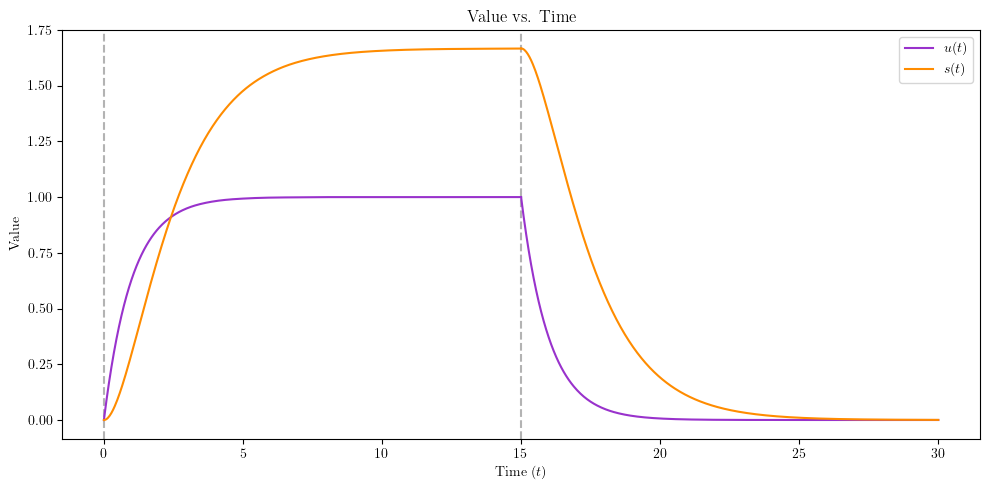

In [14]:
u_color = 'darkorchid'
s_color = 'darkorange'
a_color = 'forestgreen'

plot_a = False

plt.figure(figsize = (10, 5))
plt.axvline(x=15, color='0.7', linestyle='--')
plt.axvline(x=0, color='0.7', linestyle='--')

if plot_a:
    a1 = np.ones_like(sol_up.t)
    a1[0] = 0
    a2 = np.zeros_like(sol_down.t)
    a2[0] = 1
    plt.plot(sol_up.t, a1, label=r'$\alpha (t)$', color = a_color)
    plt.plot(sol_down.t + 15, a2, color=a_color)

plt.plot(sol_up.t, sol_up.y[0], label=r'$u(t)$', color = u_color)
plt.plot(sol_down.t + 15, sol_down.y[0], color=u_color)
plt.plot(sol_up.t, sol_up.y[1], label=r'$s(t)$', color = s_color)
plt.plot(sol_down.t + 15, sol_down.y[1], color=s_color)

plt.ylabel(r'Value')
plt.xlabel(r'Time ($t$)')
plt.title(r'Value vs. Time')
plt.tight_layout()
plt.legend(loc = 'upper right')

if plot_a:
    plt.savefig('../figures/plot_us_t_change_together_witha.png', dpi = 300)
else:
    plt.savefig('../figures/plot_us_t_change_together.png', dpi = 300)

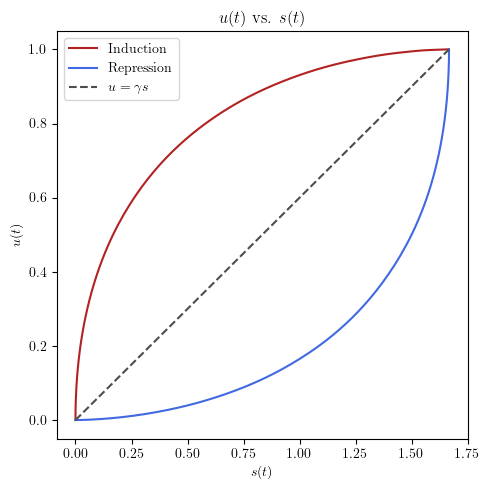

In [15]:
plt.figure(figsize = (5, 5))
plt.plot(sol_up.y[1], sol_up.y[0], label='Induction', color = 'firebrick')
plt.plot(sol_down.y[1], sol_down.y[0], label='Repression', color='royalblue')
s_line = np.linspace(0, 1/0.6, 400)
u_line = 0.6 * s_line
plt.plot(s_line, u_line, label=r'$u = \gamma s$', color='0.3', linestyle='--')
plt.xlabel(r'$s(t)$')
plt.ylabel(r'$u(t)$')
plt.legend()
plt.title(r'$u(t)$ vs. $s(t)$')
plt.tight_layout()
plt.savefig('../figures/plot_u_s_ind_rep.png', dpi = 300)

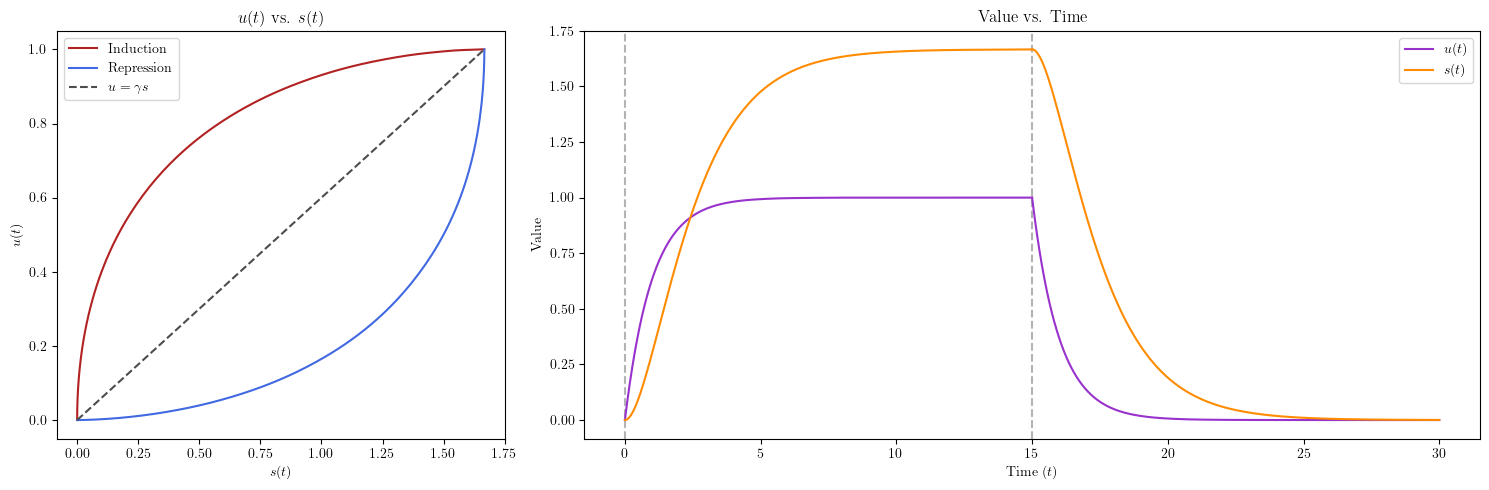

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), width_ratios=[1, 2])

axs[0].plot(sol_up.y[1], sol_up.y[0], label='Induction', color = 'firebrick')
axs[0].plot(sol_down.y[1], sol_down.y[0], label='Repression', color='royalblue')
s_line = np.linspace(0, 1/0.6, 400)
u_line = 0.6 * s_line
axs[0].plot(s_line, u_line, label=r'$u = \gamma s$', color='0.3', linestyle='--')
axs[0].set_xlabel(r'$s(t)$')
axs[0].set_ylabel(r'$u(t)$')
axs[0].legend()
axs[0].set_title(r'$u(t)$ vs. $s(t)$')

axs[1].axvline(x=15, color='0.7', linestyle='--')
axs[1].axvline(x=0, color='0.7', linestyle='--')
axs[1].plot(sol_up.t, sol_up.y[0], label=r'$u(t)$', color = u_color)
axs[1].plot(sol_down.t + 15, sol_down.y[0], color=u_color)
axs[1].plot(sol_up.t, sol_up.y[1], label=r'$s(t)$', color = s_color)
axs[1].plot(sol_down.t + 15, sol_down.y[1], color=s_color)
axs[1].set_ylabel(r'Value')
axs[1].set_xlabel(r'Time ($t$)')
axs[1].set_title(r'Value vs. Time')
plt.tight_layout()
plt.legend(loc = 'upper right')

plt.savefig('../figures/fig1_ode_explained.png', dpi = 300)